# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


# Chapter 3 - Probability Mass Functions (PMF)


In [295]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Again, I'll load the NSFG pregnancy file and select live births:

In [296]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

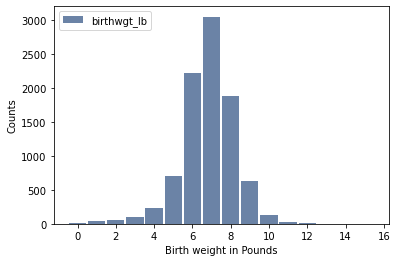

In [297]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight in Pounds', ylabel='Counts')

To normalize the distribution, we could divide through by the total count:

In [298]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

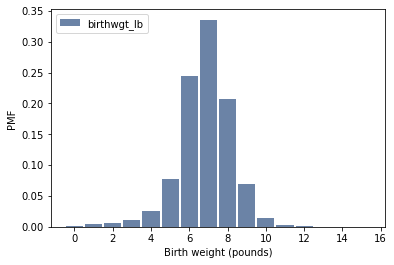

In [299]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

More directly, we can create a Pmf object.

In [300]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [301]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [302]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [303]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [304]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [ ]:
pmf.Total()

`Normalize` divides through by the total probability, making it 1 again.

In [222]:
pmf.Normalize()
pmf.Total()

1.0

Here's the PMF of pregnancy length for live births.

In [223]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

Here's what it looks like plotted with `Hist`, which makes a bar graph.

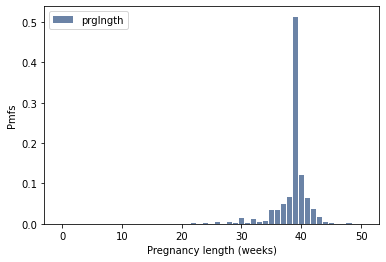

In [224]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmfs')

Here's what it looks like plotted with `Pmf`, which makes a step function.

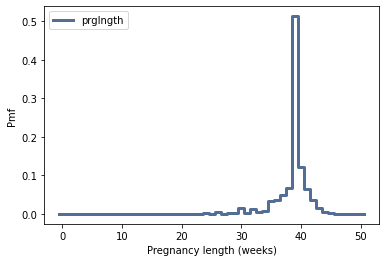

In [225]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [226]:
live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [227]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

And here's the code that replicates one of the figures in the chapter.

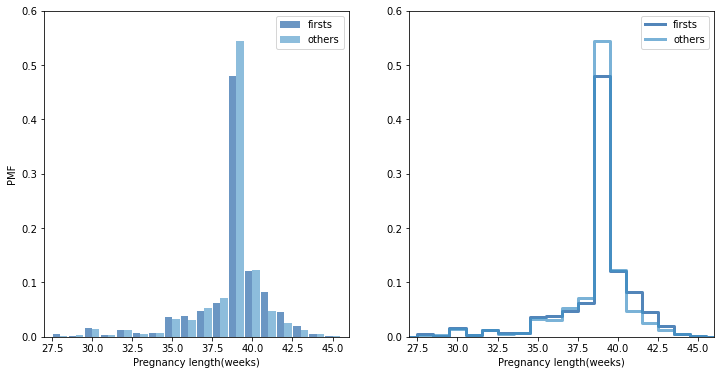

In [228]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

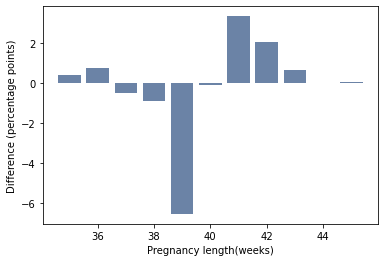

In [229]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [230]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [231]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

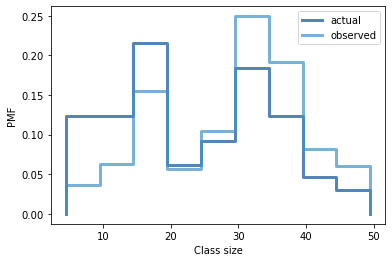

In [232]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [233]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [234]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [235]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

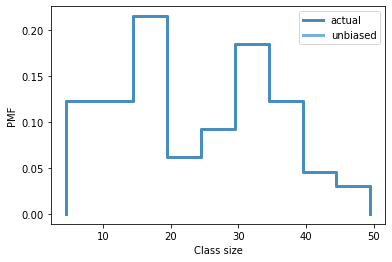

In [236]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [237]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,0.978150,-0.198400
1,0.693957,-0.212609
2,-0.497021,-1.638512
3,0.030883,-0.681194


We can specify column names when we create the DataFrame:

In [238]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.978150,-0.198400
1,0.693957,-0.212609
2,-0.497021,-1.638512
3,0.030883,-0.681194


We can also specify an index that contains labels for the rows.

In [239]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.978150,-0.198400
b,0.693957,-0.212609
c,-0.497021,-1.638512
d,0.030883,-0.681194


Normal indexing selects columns.

In [240]:
df['A']

a    0.978150
b    0.693957
c   -0.497021
d    0.030883
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [241]:
df.loc['a']

A    0.97815
B   -0.19840
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [242]:
df.iloc[0]

A    0.97815
B   -0.19840
Name: a, dtype: float64

`loc` can also take a list of labels.

In [243]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.978150,-0.198400
c,-0.497021,-1.638512


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [244]:
df['a':'c']

,A,B
a,0.978150,-0.198400
b,0.693957,-0.212609
c,-0.497021,-1.638512


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [245]:
df[0:2]

,A,B
a,0.978150,-0.198400
b,0.693957,-0.212609


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

# **Exercise Page No:35 and 3-1:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [246]:
#Acutal and Biased Distribution 
response = nsfg.ReadFemResp()

In [247]:
#assigning the label numkdhh
pmf = thinkstats2.Pmf(response.numkdhh, label='numkdhh')

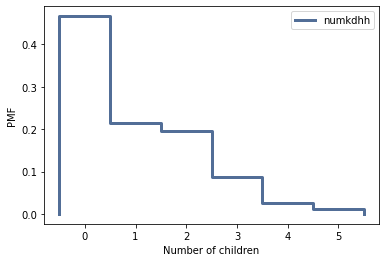

In [251]:
# using config to map both x and y axis as Childeren count and PMF
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [252]:
biased = BiasPmf(pmf, label='biased')

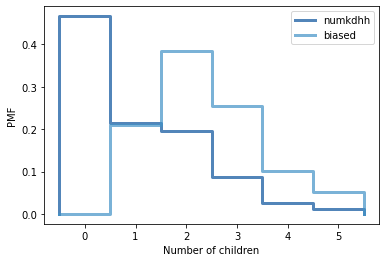

In [253]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [257]:
biased = BiasPmf(pmf, label='biased')

In [258]:
# Get the Mean Value of the PMF Variable
pmf.Mean()

1.024205155043831

In [259]:
# Get the Mean Value of the biased Variable
biased.Mean()

2.403679100664282

# Exercise Page 36: 3-2 (In “Summarizing Distributions” on page 22 we computed the mean of a sample by adding up the elements and dividing by n) 

In [260]:
from __future__ import print_function

import numpy as np
import sys

import nsfg
import first
import thinkstats2
import thinkplot

In [261]:
def PmfMean(pmf):
    #Calculating the mean of a PMF. 
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

In [262]:
def PmfVar(pmf, i=None):
     #Calculating the variance of a PMF. S^2 = \frac{\sum (x_i - \bar{x})^2}{n - 1}
        
#S^2	=	sample variance
#x_i	=	the value of the one observation
#\bar{x}	=	the mean value of all observations
# n	=	the number of observations

    if i is None:
        i = pmf.Mean()

    variance = 0.0
    for x, p in pmf.d.items():
        variance += p * (x - i) ** 2
    return variance

In [264]:
def main(script):
    live, firsts, others = first.MakeFrames() 
    # n=prglnght
    prglngth = live.prglngth
    # PmfMean and PmfVar
    pmf = thinkstats2.Pmf(prglngth)
    mean = PmfMean(pmf)
    var = PmfVar(pmf)
    print('mean and variance are : ', mean, var)
    
if __name__ == '__main__':
    main(1)

mean and variance are :  38.56055968517709 7.301863788195439


# References:
    1. http://greenteapress.com/thinkstats2/thinkplot.html

# Chapter 4 - Cumulative Distribution Functions (CDF)


In [265]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [266]:
live, firsts, others = first.MakeFrames()

In [267]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


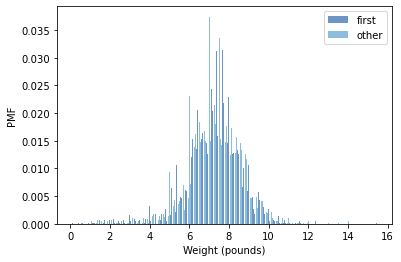

In [268]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [269]:
t = [55, 66, 77, 88, 99]

In [270]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [274]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In [275]:
t = [1, 2, 2, 3, 5]

In [276]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

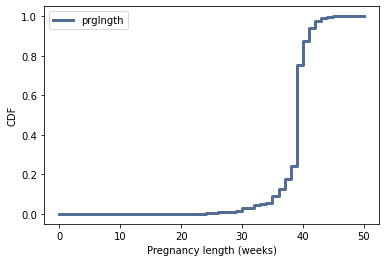

In [277]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

In [278]:
cdf.Prob(41)

0.9406427634455619

In [279]:
cdf.Value(0.5)

39

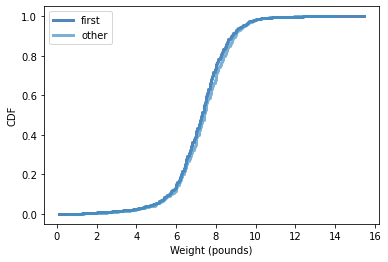

In [280]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [281]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

In [282]:
median = live_cdf.Percentile(50)
median

7.375

In [283]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

In [284]:
live_cdf.PercentileRank(10.2)

98.82717415357381

In [285]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

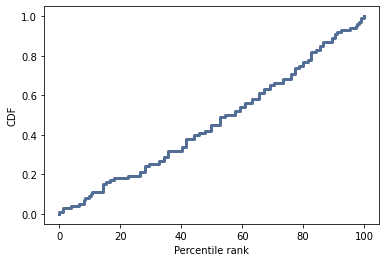

In [286]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

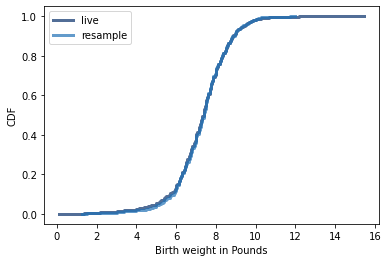

In [287]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight in Pounds', ylabel='CDF')

# **Exercise: 4-1 Page47 ** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [288]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first babies')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other than first Babies')

In [289]:
first_cdf.PercentileRank(8.5)

85.90419436167774

In [290]:
other_cdf.PercentileRank(8.5)

82.35294117647058

# **Exercise: 4-2 Page48** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [291]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [292]:
randomvariable = np.random.random(1000) 

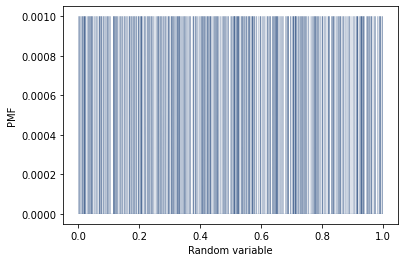

In [293]:
pmf = thinkstats2.Pmf(randomvariable)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variable', ylabel='PMF')

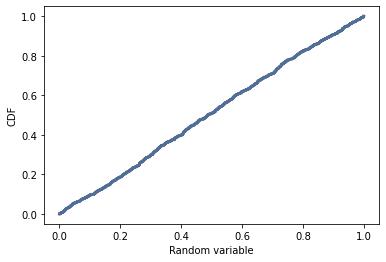

In [294]:
cdf = thinkstats2.Cdf(randomvariable)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variable', ylabel='CDF')

# Conclusion :
1. Random Numbers 1000 generated
2. By using PMF, CDF, Random Variables compared with PMF,CDF functions. 
3. CDF, this distribution is not normal

# References
1. http://greenteapress.com/thinkstats2/thinkplot.html
2. https://programtalk.com/python-examples/thinkplot.PrePlot/
3. https://www.youtube.com/watch?v=hCBr43Wv_Es
